In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("datasets//avisassurance_test.csv", encoding="utf-8", sep = ";")
train

,date,auteur,avis,assureur,produit
0,16 novemb...,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto
1,16 novemb...,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto
2,16 novemb...,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto
3,16 novemb...,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto
4,15 novemb...,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto
...,...,...,...,...,...
10327,24 août 2...,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale
10328,18 mai 20...,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles
10329,08 avril ...,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles
10330,19 avril ...,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles


## Data Exploratory / Cleaning

##### Checking NaN values

In [4]:
train[train.isnull().any(axis=1)]

,date,auteur,avis,assureur,produit
4863,28 novemb...,fredo-49657,NaN,Pacifica,auto


##### Removing rows with no 'avis'

In [6]:
train = train[train['avis'].notna()]

Count distincts per columns

In [8]:
train.nunique()

date         1732
auteur      10237
avis        10322
assureur       56
produit        13
dtype: int64

On formate pour avoir les dates en type date

In [9]:
train['date_old'] = train['date']
                            

<ipython-input-9-3d47077c6b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_old'] = train['date']


In [10]:
train['date'] = train['date'].str.replace(' janvier ', '01')
train['date'] = train['date'].str.replace(' février ', '02')
train['date'] = train['date'].str.replace(' mars ', '03')
train['date'] = train['date'].str.replace(' avril ', '04')
train['date'] = train['date'].str.replace(' mai ', '05')
train['date'] = train['date'].str.replace(' juin ', '06')
train['date'] = train['date'].str.replace(' juillet ', '07')
train['date'] = train['date'].str.replace(' août ', '08')
train['date'] = train['date'].str.replace(' septembre ', '09')
train['date'] = train['date'].str.replace(' octobre ', '10')
train['date'] = train['date'].str.replace(' novembre ', '11')
train['date'] = train['date'].str.replace(' décembre ', '12')
train['date'] = train['date'].str.replace(' ', '')
train['date'] = train['date'].str[:8]
train

<ipython-input-10-5a3fcda33468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['date'].str.replace(' janvier ', '01')
<ipython-input-10-5a3fcda33468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['date'].str.replace(' février ', '02')
<ipython-input-10-5a3fcda33468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,date,auteur,avis,assureur,produit,date_old
0,16112021,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...
1,16112021,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...
2,16112021,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...
3,16112021,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...
4,15112021,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...
...,...,...,...,...,...,...
10327,24082021,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...
10328,18052021,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...
10329,08042021,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...
10330,19042021,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...


In [11]:
train['date'] = pd.to_datetime(train['date'], format='%d%m%Y')
train

<ipython-input-11-999d8638e6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = pd.to_datetime(train['date'], format='%d%m%Y')


,date,auteur,avis,assureur,produit,date_old
0,2021-11-16,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...
1,2021-11-16,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...
2,2021-11-16,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...
3,2021-11-16,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...
4,2021-11-15,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...
...,...,...,...,...,...,...
10327,2021-08-24,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...
10328,2021-05-18,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...
10329,2021-04-08,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...
10330,2021-04-19,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...


In [12]:
train['année'] = pd.to_datetime(train['date']).dt.year
train['mois'] = pd.to_datetime(train['date']).dt.month
train['jour'] = pd.to_datetime(train['date']).dt.day
train

<ipython-input-12-8d7c366c092c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['année'] = pd.to_datetime(train['date']).dt.year
<ipython-input-12-8d7c366c092c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mois'] = pd.to_datetime(train['date']).dt.month
<ipython-input-12-8d7c366c092c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,date,auteur,avis,assureur,produit,date_old,année,mois,jour
0,2021-11-16,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...,2021,11,16
1,2021-11-16,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...,2021,11,16
2,2021-11-16,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...,2021,11,16
3,2021-11-16,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...,2021,11,16
4,2021-11-15,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...,2021,11,15
...,...,...,...,...,...,...,...,...,...
10327,2021-08-24,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...,2021,8,24
10328,2021-05-18,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...,2021,5,18
10329,2021-04-08,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...,2021,4,8
10330,2021-04-19,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...,2021,4,19


# Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Longueur moyenne des avis par note
On ajoute une colonne comptant la longueur des avis

In [15]:
train['avis_length'] = train.avis.str.len()
train

<ipython-input-15-5b4069b93876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis_length'] = train.avis.str.len()


,date,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length
0,2021-11-16,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...,2021,11,16,182
1,2021-11-16,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...,2021,11,16,153
2,2021-11-16,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...,2021,11,16,161
3,2021-11-16,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...,2021,11,16,159
4,2021-11-15,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...,2021,11,15,151
...,...,...,...,...,...,...,...,...,...,...
10327,2021-08-24,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...,2021,8,24,2701
10328,2021-05-18,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...,2021,5,18,724
10329,2021-04-08,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...,2021,4,8,306
10330,2021-04-19,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...,2021,4,19,2033


Voyons si ce résultat varient beaucoup en fonction des 'produits' que nous avons.

In [16]:
train['produit'].value_counts()

auto                                     6081
sante                                    1477
moto                                      916
habitation                                859
prevoyance                                319
vie                                       257
credit                                    255
animaux                                   149
responsabilite-civile-professionnelle       5
multirisque-professionnelle                 4
assurances-professionnelles                 4
flotte-automobile                           3
garantie-decennale                          2
Name: produit, dtype: int64

Aucune grande différence notable avec les cinq assureurs ayant le plus d'avis.

Même processus en fonction des années :

<AxesSubplot:title={'center':"Répartition du nombre d'avis par an"}, xlabel='année', ylabel='count'>

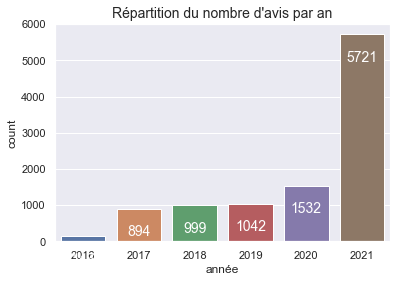

In [18]:
sns.set_theme(style="darkgrid")
countplot_année = sns.countplot(x = "année", data = train)
countplot_année.set_title("Répartition du nombre d'avis par an", fontsize=14)
# Ajout du count sur la visualisation
for p in countplot_année.patches:
    countplot_année.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
countplot_année

Faisons maintenant une analyse sur les majuscules.
On ajoute une colonne calculant le pourcentage de majuscule dans un avis

In [19]:
train['maj_pourcentage'] = train['avis'].str.findall(r'[A-Z]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()
train

<ipython-input-19-1d33155e25ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['maj_pourcentage'] = train['avis'].str.findall(r'[A-Z]').str.len()/train['avis'].str.findall(r'[a-zA-Z]').str.len()


,date,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage
0,2021-11-16,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...,2021,11,16,182,0.013699
1,2021-11-16,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...,2021,11,16,153,0.034188
2,2021-11-16,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...,2021,11,16,161,0.024194
3,2021-11-16,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...,2021,11,16,159,0.007752
4,2021-11-15,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...,2021,11,15,151,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10327,2021-08-24,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...,2021,8,24,2701,0.022596
10328,2021-05-18,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...,2021,5,18,724,0.040146
10329,2021-04-08,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...,2021,4,8,306,0.012821
10330,2021-04-19,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...,2021,4,19,2033,0.051713


In [20]:
import string
def max_maj_in_a_row(row):
    avis = row['avis']   
    #On enlève les espaces
    avis = avis.replace(' ', '')
    #On enlève la punctuation
    avis = avis.translate(str.maketrans('', '', string.punctuation))

    max_maj = 0
    maj_in_a_row = 0
    for char in avis:
        if char.isupper():
            maj_in_a_row = maj_in_a_row + 1
        else : maj_in_a_row = 0
        if maj_in_a_row > max_maj:
            max_maj = maj_in_a_row
    return max_maj

In [21]:
train['max_maj_in_a_row'] = train.apply(lambda row: max_maj_in_a_row(row), axis = 1)
train

<ipython-input-21-c43b995b9169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['max_maj_in_a_row'] = train.apply(lambda row: max_maj_in_a_row(row), axis = 1)


,date,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,max_maj_in_a_row
0,2021-11-16,lognos-d-139728,Satisfait des tarif et rapide j'attends de voi...,L'olivier Assurance,auto,16 novemb...,2021,11,16,182,0.013699,1
1,2021-11-16,paugam-l-139727,"Bon service, service réactif. Tout en ligne pr...",L'olivier Assurance,auto,16 novemb...,2021,11,16,153,0.034188,1
2,2021-11-16,rozgonyi-o-139704,L’assurance Olivier est une très bonne assuran...,L'olivier Assurance,auto,16 novemb...,2021,11,16,161,0.024194,1
3,2021-11-16,saad-hellal-h-139697,Je suis satisfait de l'olivier assurances pas ...,L'olivier Assurance,auto,16 novemb...,2021,11,16,159,0.007752,1
4,2021-11-15,damis-s-139693,le prix est attractif par rapport à ma situati...,L'olivier Assurance,auto,15 novemb...,2021,11,15,151,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10327,2021-08-24,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,24 août 2...,2021,8,24,2701,0.022596,7
10328,2021-05-18,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,18 mai 20...,2021,5,18,724,0.040146,9
10329,2021-04-08,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,08 avril ...,2021,4,8,306,0.012821,1
10330,2021-04-19,lkio-110907,"Bonjour,\r\n\r\nJe constate qu'entre le moment...",Generali,assurances-professionnelles,19 avril ...,2021,4,19,2033,0.051713,5


Je cache les outliers parce qu'on voit rien sinon.

In [26]:
y_list = list(range(5000,5005))
for y in y_list:
    print(train['avis'][y])

A fuire, 15 jours que je me bat avec eux pour avoir un relevé d'information pour pouvoir assurer mon véhicule, je n'est toujours rien reçu alors que les autres assurances on l'à au bout de 5 minutes .
Excellent rapport qualité/prix. À l’occasion d’un accident, prestations au top et réactive avec enlèvement du véhicule à domicile + livraison à domicile du véhicule de prêt.
Après devis et signature pour assurance auto, je fournis tout les documents demandé et là on me signale que mes années en tant que conducteur secondaire chez concurrence ne compte pas et qu'il faut rééditer le contrat, après rectification la facture mensuel se voit triplé! Je refuse alors le nouveau contrat et l'on me signal que je dois encore régler ~220€ avant de partir (alors que si contrat augmente l'on peut quitter assurance sans frais supplémentaire et que tout était réglé pour ma part, inscription+1 mois chez eux...) Opposition à la banque et maintenant des relances.
Bonjour tout comme Clément j'ai un gros prob

On souhaite maintenant remplacer tous les espaces multiples en un simple espace, pareil pour la ponctuation. Et forcer toutes les lettres à être en minuscules.

In [27]:
train['avis'] = train['avis'].str.replace('.', ' ')
train['avis'] = train['avis'].str.replace(',', ' ')
train['avis'] = train['avis'].str.replace(':', ' ')
train['avis'] = train['avis'].str.replace(';', ' ')
train['avis'] = train['avis'].str.replace('?', ' ')
train['avis'] = train['avis'].str.replace('!', ' ')
train['avis'] = train['avis'].str.replace('\s{2,}', ' ')

<ipython-input-27-151ff8478f62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  train['avis'] = train['avis'].str.replace('.', ' ')
<ipython-input-27-151ff8478f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis'] = train['avis'].str.replace('.', ' ')
<ipython-input-27-151ff8478f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['a

Réussir à comprendre comment lemmatizer les mots en français avec Spacy, ça devrait être possible (https://github.com/sammous/spacy-lefff)

In [28]:
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer()

nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('french_lemmatizer', name='lefff')

In [29]:
avis_lem = nlp(train['avis'][10])
for word in avis_lem:
    print(word.lemma_)

Tres
bien
le
prix
être
corrects
mais
je
trouve
le
franchise
un
peu
haute
dommage
que
vous
n
assurer
pas
le
2
roue
et
le
quadricycle
rabai
pour
parrainage
sympa


In [30]:
def get_lemma_avis(row):
    avis_temp = row['avis']
    avis_temp = nlp(avis_temp)
    avis = ""
    for word in avis_temp:
        avis = avis + " " + str(word.lemma_)
    return avis

In [31]:
train['avis'] = train.apply(lambda row: get_lemma_avis(row), axis = 1)
train['avis'][10]

<ipython-input-31-988ff28848d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis'] = train.apply(lambda row: get_lemma_avis(row), axis = 1)


' Tres bien le prix être corrects mais je trouve le franchise un peu haute dommage que vous n assurer pas le 2 roue et le quadricycle rabai pour parrainage sympa'

On enlève les stopwords

In [34]:
import nltk
from nltk.corpus import stopwords

In [35]:
stop = stopwords.words('french')
train['avis'] = train['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train['avis'][10]

<ipython-input-35-dfde161e3a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['avis'] = train['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


'Tres bien prix être corrects trouve franchise peu haute dommage assurer 2 roue quadricycle rabai parrainage sympa'

Encode avec un TF-IDF ou un BOW puis tester les différents modèles
Trying a LightGBM

TF_IDF

In [36]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    words = tokeniser.tokenize(text)
    return words

In [38]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text)

# Fit to the data and transform to feature matrix
avis_vectorised = vectoriser.fit_transform(train['avis'])

# Convert sparse matrix to dataframe
avis_vectorised = pd.DataFrame.sparse.from_spmatrix(avis_vectorised)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in avis_vectorised.columns:
    avis_vectorised.rename(columns={col: col_map[col]+ '_word'}, inplace=True)
avis_vectorised


,0_word,00_word,000_word,000km_word,0014_word,002_word,003345003z_word,00euros_word,00h00_word,01_word,...,événementiel_word,événemer_word,éxpliquer_word,éxécution_word,être_word,êtres_word,île_word,ù_word,œil_word,œuvre_word
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.155668,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.164873,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.060347,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.159568,0.0,0.0,0.0,0.0,0.0
10327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.165342,0.0,0.0,0.0,0.067085,0.0,0.0,0.0,0.0,0.0
10328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177751,...,0.000000,0.0,0.0,0.0,0.038206,0.0,0.0,0.0,0.0,0.0
10329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.058498,0.0,0.0,0.0,0.0,0.0


On concat avec ce qu'on avait avant

In [39]:
train = pd.concat([train, avis_vectorised], axis=1).reindex(train.index)

On drop les colonnes qui nous intéresse pas et on get_dummies les colonnes à catégories, puis on export le dataframe en csv pour appliquer nos modèles de ML

In [40]:
columns_to_encode = ['assureur', 'produit']
columns_to_delete = ['avis','date','auteur','date_old','année','mois','jour']

for column in columns_to_delete:
    train = train.drop([column], axis = 1)
train = pd.get_dummies(train, columns=columns_to_encode)

In [41]:
train.to_pickle('test_processed.pkl')